## Rihad Variawa
### 09-03-2019

# Importing Dataset

In [0]:
from google.colab import files
files.upload()

Saving fundamentals.csv.zip to fundamentals.csv (1).zip


{'fundamentals.csv.zip': b'PK\x03\x04-\x00\x08\x00\x08\x00tRVJ\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\x10\x008\x00fundamentals.csv\x01\x00\x10\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\n\x00 \x00\x00\x00\x00\x00\x01\x00\x18\x00\xc8C\xd2-\xf5\x8c\xd2\x01\xc8C\xd2-\xf5\x8c\xd2\x01\xc8C\xd2-\xf5\x8c\xd2\x01|}I\x97$\xc7\x91\xde=\x7fE\xbd9H\x07e\xc4\xf8\xbe\x1c\x9b$\xc8G\r9\x84\x08j\xde\x93n\xcd\xee\xc2\xb04\x8d.\xa8\xba\xc1!\xfe\xbd\xcc\xdc\xdd\xcc>\x8f*\x08d\x01\x99\x11\x91\x1e\xbe\xd8\xbe\xde\xff\xf2\xf4\xe1?\x1e_\x1e\xbe\xfb\xf9\x87\xbf>\x7f\xba\x7f\xfb\xf8\xf2\xf4\xfc\xf1\xe1\x9b\xcf\x1f\x9f>\xff\xfb\xfd\xdd\x87\x0f\xcf?}\xfe\xfa\xe5\xe1\xdb\xf7?\xbf\xff\xeb\xa7G\xbb\xf0\xe7\xc7\x0f\x8fO\x7f\x9f\xd7>~\xfc\xaf\x9f\x1e\x9e>\x7fx\xfe\xe1\xf1\x9f\x1f\xff\xf1\xe3\xe3\xe7/\x8f\x0fO_\x1f\x7f\xf8r\x7f\xf7\xfdW\x1a\xfa/\xef\xff\xf1\xf0\xe7?}s\xff\xf5\xfb\x1f\x9f\xbe\xbe\xff\xf4\xf0\r?\xf3\xf1\xe9\xebO/\x8f_\xf4\xe2w?\xbd\xfc\xf8\xe9\'\xfe\xfe\xe5o\x0f\x7f~\xff

In [0]:
!ls

'fundamentals.csv (1).zip'   prices.csv       sample_data
 fundamentals.csv.zip	     prices.csv.zip


In [0]:
# unzip data for usage
!unzip fundamentals.csv.zip

Archive:  fundamentals.csv.zip
replace fundamentals.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Loading Packages

In [0]:
#importing lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go
init_notebook_mode()

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
stocks = pd.read_csv('fundamentals.csv')

In [0]:
stocks.head()

Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
0           0           AAL    2012-12-31      3.068000e+09   
1           1           AAL    2013-12-31      4.975000e+09   
2           2           AAL    2014-12-31      4.668000e+09   
3           3           AAL    2015-12-31      5.102000e+09   
4           4           AAP    2012-12-29      2.409453e+09   

   Accounts Receivable  Add'l income/expense items  After Tax ROE  \
0         -222000000.0               -1.961000e+09           23.0   
1          -93000000.0               -2.723000e+09           67.0   
2         -160000000.0               -1.500000e+08          143.0   
3          352000000.0               -7.080000e+08          135.0   
4          -89482000.0                6.000000e+05           32.0   

   Capital Expenditures  Capital Surplus  Cash Ratio  \
0         -1.888000e+09     4.695000e+09        53.0   
1         -3.114000e+09     1.059200e+10        75.0   
2         -5.311000e+09     1.513500e+10        60.0   
3         -6.151000e+09     1.159100e+10        51.0   
4         -2.711820e+08     5.202150e+08        23.0   

               ...               Total Current Assets  \
0              ...                       7.072000e+09   
1              ...                       1.432300e+10   
2              ...                       1.175000e+10   
3              ...                       9.985000e+09   
4              ...                       3.184200e+09   

   Total Current Liabilities  Total Equity  Total Liabilities  \
0               9.011000e+09 -7.987000e+09       2.489100e+10   
1               1.380600e+10 -2.731000e+09       4.500900e+10   
2               1.340400e+10  2.021000e+09       4.120400e+10   
3               1.360500e+10  5.635000e+09       4.278000e+10   
4               2.559638e+09  1.210694e+09       3.403120e+09   

   Total Liabilities & Equity  Total Revenue  Treasury Stock  For Year  \
0                1.690400e+10   2.485500e+10    -367000000.0    2012.0   
1                4.227800e+10   2.674300e+10             0.0    2013.0   
2                4.322500e+10   4.265000e+10             0.0    2014.0   
3                4.841500e+10   4.099000e+10             0.0    2015.0   
4                4.613814e+09   6.205003e+09     -27095000.0    2012.0   

   Earnings Per Share  Estimated Shares Outstanding  
0               -5.60                  3.350000e+08  
1              -11.25                  1.630222e+08  
2                4.02                  7.169154e+08  
3               11.39                  6.681299e+08  
4                5.29                  7.328355e+07  

[5 rows x 79 columns]

In [0]:
stocks.shape

(1781, 79)

In [0]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 79 columns):
Unnamed: 0                                             1781 non-null int64
Ticker Symbol                                          1781 non-null object
Period Ending                                          1781 non-null object
Accounts Payable                                       1781 non-null float64
Accounts Receivable                                    1781 non-null float64
Add'l income/expense items                             1781 non-null float64
After Tax ROE                                          1781 non-null float64
Capital Expenditures                                   1781 non-null float64
Capital Surplus                                        1781 non-null float64
Cash Ratio                                             1482 non-null float64
Cash and Cash Equivalents                              1781 non-null float64
Changes in Inventories                            

In [0]:
top_rev = stocks.groupby(by='Ticker Symbol').agg({'Total Revenue':sum})

In [0]:
g = top_rev['Total Revenue'].nlargest(5)

In [0]:
next = [Bar(
            y=g,
            x=g.keys(),
            marker = dict(
            color = 'lightsteelblue'
            ),
            name = "Contractor's amount earned per project"
    )]
layout1 = go.Layout(
    title="Top 10 Exporters",
    xaxis=dict(
        title='Company',
        titlefont=dict(
            family='Courier New, monospace',
            size=30,
            color='#7f7f7f'
               )
    ),
    yaxis=dict(
        title='Total Revenue',
        titlefont=dict(
            family='Courier New, monospace',
            size=22,
            color='#7f7f7f'
        )
    )
)
myFigure2 = go.Figure(data = next, layout = layout1)
iplot(myFigure2)

Here are the top 5 stocks that has the biggest revenue: 

    1. Walmart 
    2. EXXON MOBIL corp
    3. Apple inc.
    4. Chevron Corp.
    5. General Motoros

# Walmart 

Now lets do some Linear Regression with the top search, Walmart(wmt)

In [0]:
wmt = stocks[stocks['Ticker Symbol']=='WMT']
#sns.distplot(Aqua['Generation'],bins=28,kde=False,color='red')

In [0]:
wmt.head()

Unnamed: 0 Ticker Symbol Period Ending  Accounts Payable  \
1706        1706           WMT    2013-01-31      5.909900e+10   
1707        1707           WMT    2014-01-31      5.717400e+10   
1708        1708           WMT    2015-01-31      5.858300e+10   
1709        1709           WMT    2016-01-31      5.861500e+10   

      Accounts Receivable  Add'l income/expense items  After Tax ROE  \
1706         -614000000.0                 186000000.0           22.0   
1707         -566000000.0                 119000000.0           21.0   
1708         -569000000.0                 113000000.0           20.0   
1709          -19000000.0                  81000000.0           18.0   

      Capital Expenditures  Capital Surplus  Cash Ratio  \
1706         -1.289800e+10     3.620000e+09        11.0   
1707         -1.311500e+10     2.362000e+09        10.0   
1708         -1.217400e+10     2.462000e+09        14.0   
1709         -1.147700e+10     1.805000e+09        13.0   

                  ...               Total Current Assets  \
1706              ...                       5.994000e+10   
1707              ...                       6.118500e+10   
1708              ...                       6.327800e+10   
1709              ...                       6.023900e+10   

      Total Current Liabilities  Total Equity  Total Liabilities  \
1706               7.181800e+10  7.634300e+10       1.267620e+11   
1707               6.934500e+10  7.625500e+10       1.284960e+11   
1708               6.525300e+10  8.139400e+10       1.220960e+11   
1709               6.461900e+10  8.054600e+10       1.190350e+11   

      Total Liabilities & Equity  Total Revenue  Treasury Stock  For Year  \
1706                2.031050e+11   4.686510e+11             0.0    2013.0   
1707                2.047510e+11   4.762940e+11             0.0    2014.0   
1708                2.034900e+11   4.856510e+11             0.0    2015.0   
1709                1.995810e+11   4.821300e+11             0.0    2016.0   

      Earnings Per Share  Estimated Shares Outstanding  
1706                5.04                  3.372817e+09  
1707                4.90                  3.269796e+09  
1708                5.07                  3.227416e+09  
1709                4.58                  3.208297e+09  

[4 rows x 79 columns]

In [0]:
gir = ['Total Equity',
       'Total Revenue',
       'Accounts Payable',
       'Accounts Receivable',
      'Cost of Revenue',
      'Profit Margin',
      'Sale and Purchase of Stock',
      'Earnings Per Share']
tip = np.corrcoef(wmt[gir].values.T)


In [0]:
wmt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1706 to 1709
Data columns (total 79 columns):
Unnamed: 0                                             4 non-null int64
Ticker Symbol                                          4 non-null object
Period Ending                                          4 non-null object
Accounts Payable                                       4 non-null float64
Accounts Receivable                                    4 non-null float64
Add'l income/expense items                             4 non-null float64
After Tax ROE                                          4 non-null float64
Capital Expenditures                                   4 non-null float64
Capital Surplus                                        4 non-null float64
Cash Ratio                                             4 non-null float64
Cash and Cash Equivalents                              4 non-null float64
Changes in Inventories                                 4 non-null float64
Common St

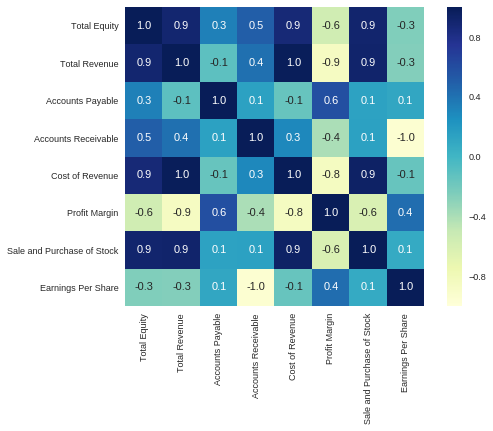

In [0]:
sns.set(font_scale = 0.9)
map = sns.heatmap(tip, cbar = True,
                  cmap = "YlGnBu",
                  annot = True, 
                  square = True,
                  fmt = '.1f',
                  annot_kws = {'size':11}, 
                 yticklabels = gir,
                 xticklabels = gir)

# Linear Regression

In [0]:
#Setting the arrays 

n = wmt['Total Revenue']
m = wmt[['Accounts Payable',
         'Cost of Revenue',
         'Sale and Purchase of Stock'   
]]

In [0]:
# Splitting the into sets of training and test.
train,test,train_label,test_label=train_test_split(m,n,test_size=0.33,random_state=101)

In [0]:
# The model 
Linear = LinearRegression(fit_intercept=True)
mo = Linear.fit(train,train_label)
predi = mo.predict(test)
print(r2_score(test_label,predi))

0.9040844778623716


In [0]:
print(Linear.intercept_)

-26432639718.136536


In [0]:
# Finding the coefficient. (value of 1 unit increase) 
coef = pd.DataFrame(Linear.coef_,m.columns,columns=['Coefficient'])
coef

Coefficient
Accounts Payable               0.649477
Cost of Revenue                1.313827
Sale and Purchase of Stock     0.694548